In [2]:
import pandas as pd

In [3]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [1]:
import yfinance as yf
import datetime as dt

In [8]:
start = dt.datetime(2022,1,1)
end = dt.datetime(2022,2,8)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2022-01-03,213.949997,216.899994,212.300003,214.050003
2022-01-04,214.899994,220.800003,212.449997,217.800003
2022-01-05,218.500000,218.699997,214.300003,214.850006
2022-01-06,211.949997,215.399994,211.050003,213.949997
2022-01-07,214.899994,216.649994,212.500000,213.199997
2022-01-10,214.899994,217.750000,213.949997,215.649994
2022-01-11,217.000000,221.800003,215.850006,217.949997
2022-01-12,219.800003,222.750000,217.649994,218.399994
2022-01-13,219.250000,220.899994,217.149994,218.649994


In [12]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (25, 1)


In [9]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    print("************")
    

RMSE-Testset: 0.6420663072139845
maPe-Testset: 0.96
************
RMSE-Testset: 0.4070044821492278
maPe-Testset: 74582766875531.8
************
RMSE-Testset: 0.24483980475724684
maPe-Testset: 138224629204541.4
************
RMSE-Testset: 0.24299696737104823
maPe-Testset: 140294350228290.42
************


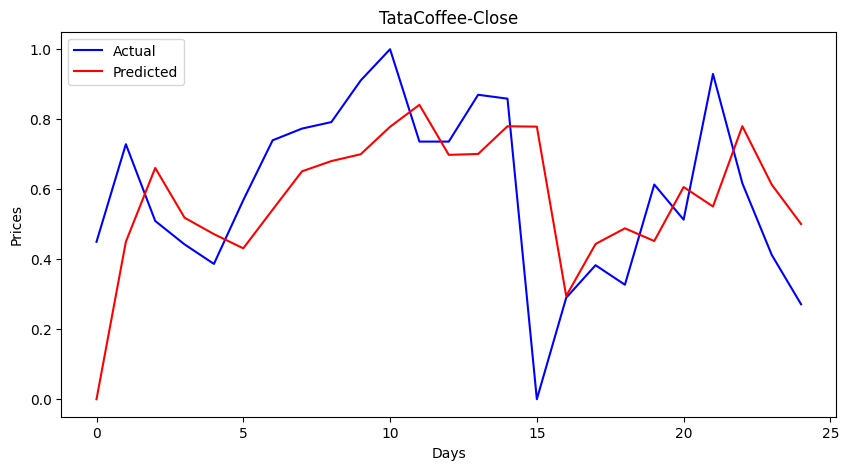

In [16]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [17]:
len(data1)

25

In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [19]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

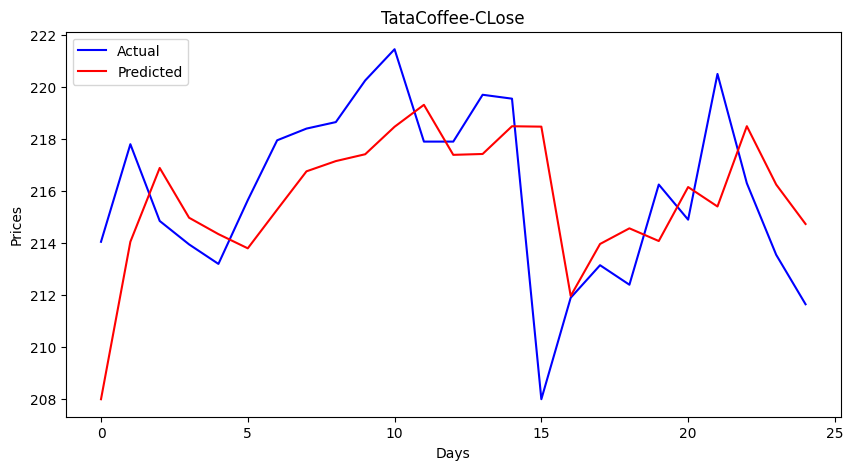

In [20]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [21]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 3.2683084695727076
maPe-Testset: 0.011667081242714296


In [22]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [23]:
forecast

array([0.41971168, 0.49585417])

In [24]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [20]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [25]:
forecast_stock_price_test_oriF

,Closefore
0,213.645121
1,214.669237


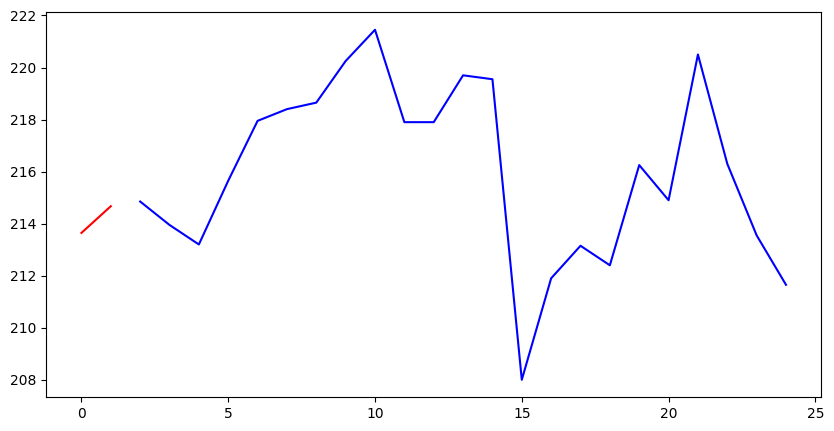

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
